# Nemhauser Ullman for the knapsack problem

This is an implementation of Nemhauser Ullman algorithm for the knapsack problem. 

This was done as a part of Lecture "Randomized Algorithms and Probabilistic Analysis" by Prof. Heiko Roglin at University of Bonn

In [381]:
# declare items
names = ['mouse', 'laptop', 'keyboard', 'book', 'pencil', 'cellphone']
weights = [5, 15, 7, 9, 2, 5]
profits = [10, 70, 25, 20, 2, 50]
number_of_items = len(weights)

In [382]:
print("Total weight is {}".format(sum(weights)))
print("Total profit is {}".format(sum(profits)))

Total weight is 43
Total profit is 177


In [383]:
knapsack_capacity = 10

In [384]:
import matplotlib.pyplot as plt
%matplotlib inline

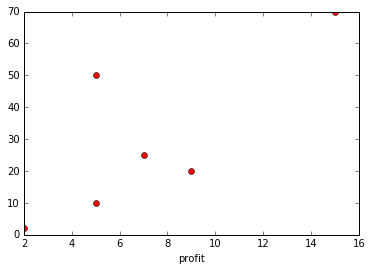

In [385]:
plt.plot(weights, profits, 'ro', label='')
plt.xlabel('weight')
plt.xlabel('profit')
plt.show()


In [386]:
from __future__ import division
profit_weight_relation = sorted([round(w/p, 3) for w, p in zip(weights, profits)])

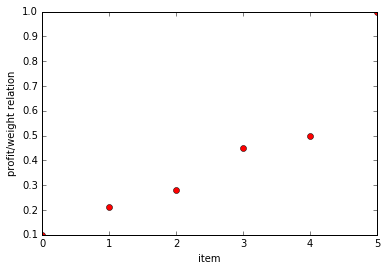

In [387]:
plt.plot(profit_weight_relation, 'ro', label='')
plt.ylabel('profit/weight relation')
plt.xlabel('item')
plt.show()

# Every possible combination of items

For every item from 1 to n, generate a string {0,1}^n, 
where 0 means we don't pick an item, and 1 means we pick it

In [388]:
import itertools
solutions = list(itertools.product([0, 1], repeat=number_of_items))

In [389]:
solution_weights = []
solution_profits = []

for solution in solutions:
    total_profit = 0
    total_weight = 0
    for index, item in enumerate(solution):
        if item:
            total_weight += weights[index]
            total_profit += profits[index]
    solution_weights.append(total_weight)
    solution_profits.append(total_profit)     

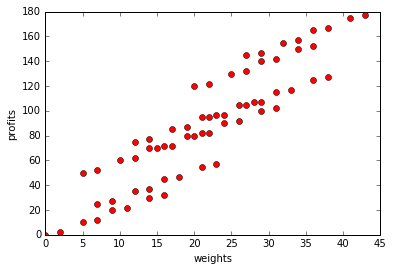

In [390]:
plt.plot(solution_weights, solution_profits, 'ro', label='')
plt.xlabel('weights')
plt.ylabel('profits')
plt.show()

In [391]:
print sorted(solution_profits[0:5])
print sorted(solution_weights[0:5])

[0, 2, 20, 50, 52]
[0, 2, 5, 7, 9]


# Generate sets P and Pi

In [403]:
import copy

resultP = []
resultPi = []
P_plus_item = []
P = [(0,0)]

resultP.append(P)

for item in range(number_of_items):
    P_plus_item = copy.deepcopy(P)
    for i, point in enumerate(P_plus_item):
        weight, profit = point
        P_plus_item[i] = tuple((weight + weights[item], profit + profits[item]))
    P = P + P_plus_item
    resultP.append(P)
    resultPi.append(P_plus_item)

# Plot P and Pi

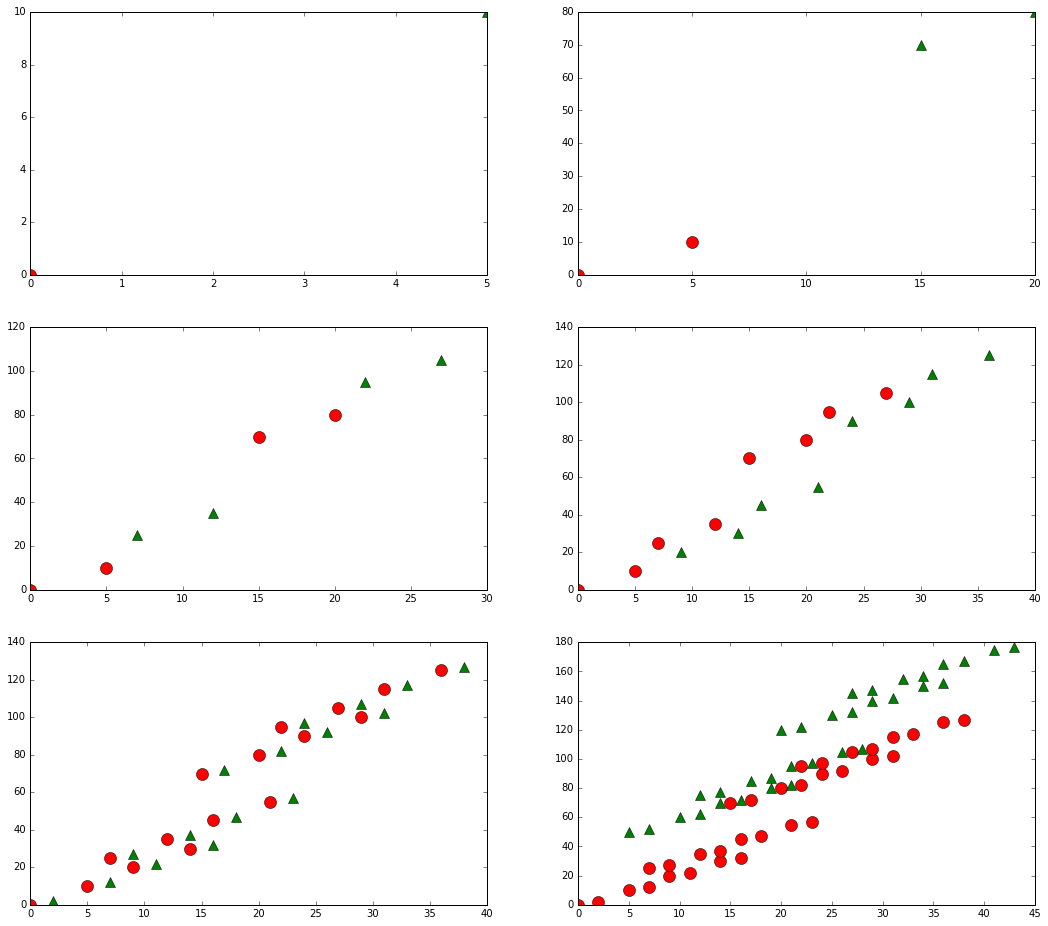

In [413]:
f, axarr = plt.subplots(3, 2, figsize=(18, 16))
# Fine-tune figure; make subplots farther from each other.

results_number = -1
for i in range(3):
    for j in range(2):
        results_number += 1
        if results_number < len(result):
            x, y = zip(*sorted(resultP[results_number]))
            axarr[i, j].plot(x,y, 'ro', ms=12)
            x, y = zip(*sorted(resultPi[results_number]))
            axarr[i, j].plot(x,y, 'g^', ms=10)

plt.show()
f.subplots_adjust(hspace=0.5)

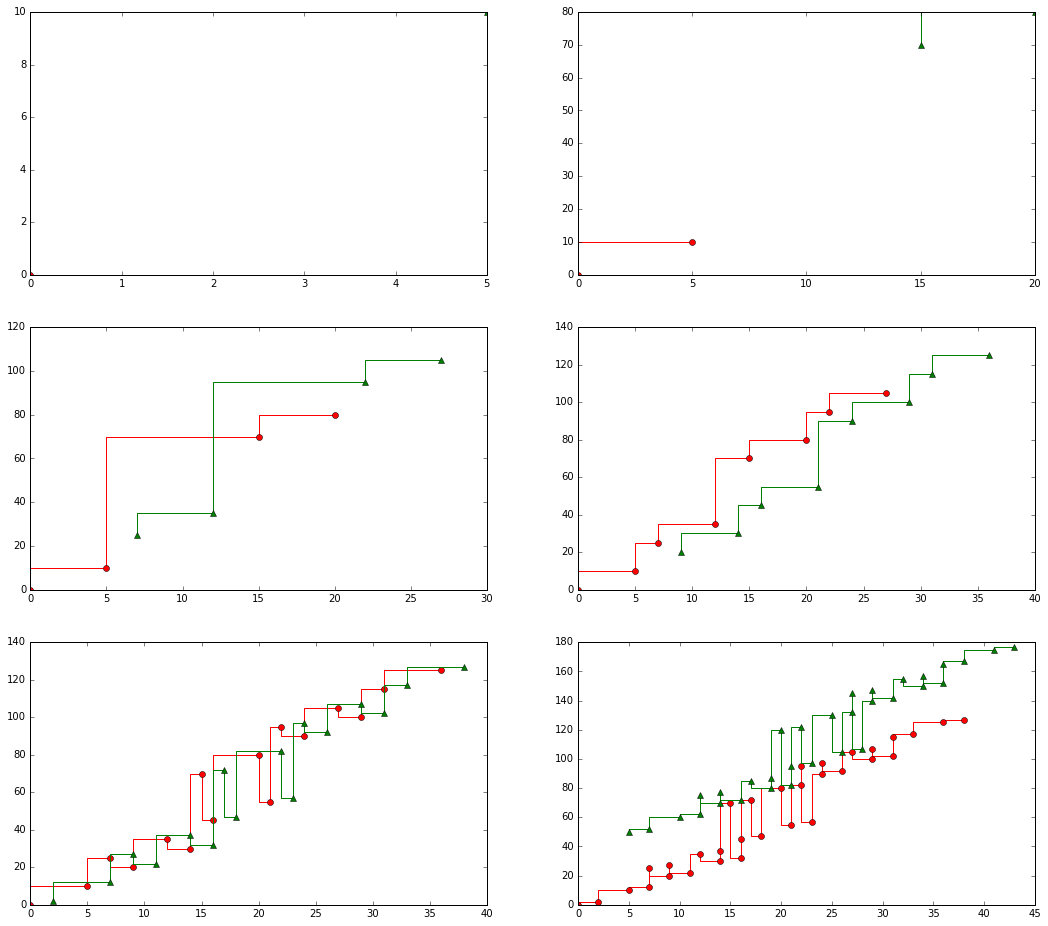

In [417]:
f, axarr = plt.subplots(3, 2, figsize=(18, 16))
# Fine-tune figure; make subplots farther from each other.

results_number = -1
for i in range(3):
    for j in range(2):
        results_number += 1
        if results_number < len(result):
            x, y = zip(*sorted(resultP[results_number]))
            axarr[i, j].step(x,y, 'ro')
            x, y = zip(*sorted(resultPi[results_number]))
            axarr[i, j].step(x,y, 'g^')

plt.show()
f.subplots_adjust(hspace=0.5)

# Calculate set Q = P union Pi (sorted in non-decreasing order)